<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI3_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PADAWAN: JOSE ARMANDO ALVARADO RUIZ

# **FUNDAMENTOS DE ESTADÍSTICA**
**Entrega: M2_AI3_PREDICCIÓN_VENTAS**



Descripción de la tarea:

Una empresa os ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017.

Necesitáis realizar las siguientes tareas:

- Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.
- ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?
- Evaluar el modelo a través de la SCE y el coeficiente de determinación.

Comenta y justifica todos los resultados obtenidos en cada apartado.

IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Carga de Datos y visualización general

In [2]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.

In [4]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


In [5]:
# estructura de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [6]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,Fecha_anual,Inversion,Ventas
count,38.000000,38.000000,38.000000
mean,1998.500000,10.250000,10.492895
std,11.113055,5.556528,4.315321
min,1980.000000,1.000000,0.620000
25%,1989.250000,5.625000,7.565000
50%,1998.500000,10.250000,11.080000
75%,2007.750000,14.875000,14.032500
max,2017.000000,19.500000,17.450000


El dataset consta de **38 registros** con **3 variables**.


**Análisis de variables:**


- fecha_anual: Corresponde al período anual de analisis. Variable del tipo Cualitativa del tipo ordinal y en función del análisis de datos como Categórica.

- Inversion: Monto total asociado a inversión en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.

- Ventas: Monto total asociado a ventas expresado en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.



**REPRESENTACIÓN GRÁFICA**


El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


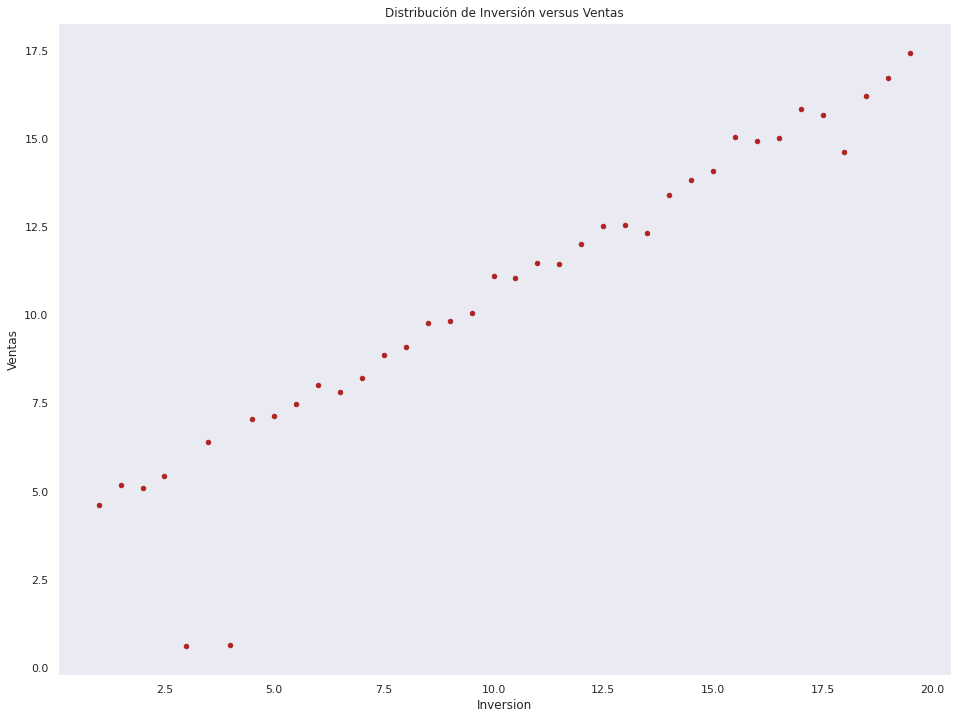

In [27]:
# Gráfico  de dispersión 
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 12))

df.plot(
    x    = 'Inversion',
    y    = 'Ventas',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Inversión versus Ventas');

In [29]:
# Correlación lineal entre Inversión y Ventas
# ==============================================================================
corr_test = pearsonr(x = df['Inversion'], y =  df['Ventas'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9562823420491505
P-value:  8.254979555521999e-21


El gráfico y el test de correlación muestran una relación lineal, de fuerte intensidad (r = 0.956) y significativa (p-value = 8.2549). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir las ventas en función de la inversión.

In [31]:
covarianza = df.cov()["Inversion"]["Ventas"]
print("Covarianza de las variables: ", covarianza)

Covarianza de las variables:  22.92993243243243


Con la ***covarianza***, vemos que la relación es positiva, es decir, presenta una relación directa. Esto implica que a medida que aumentan la inversión, hay una tendencia a que se incrementen las ventas.

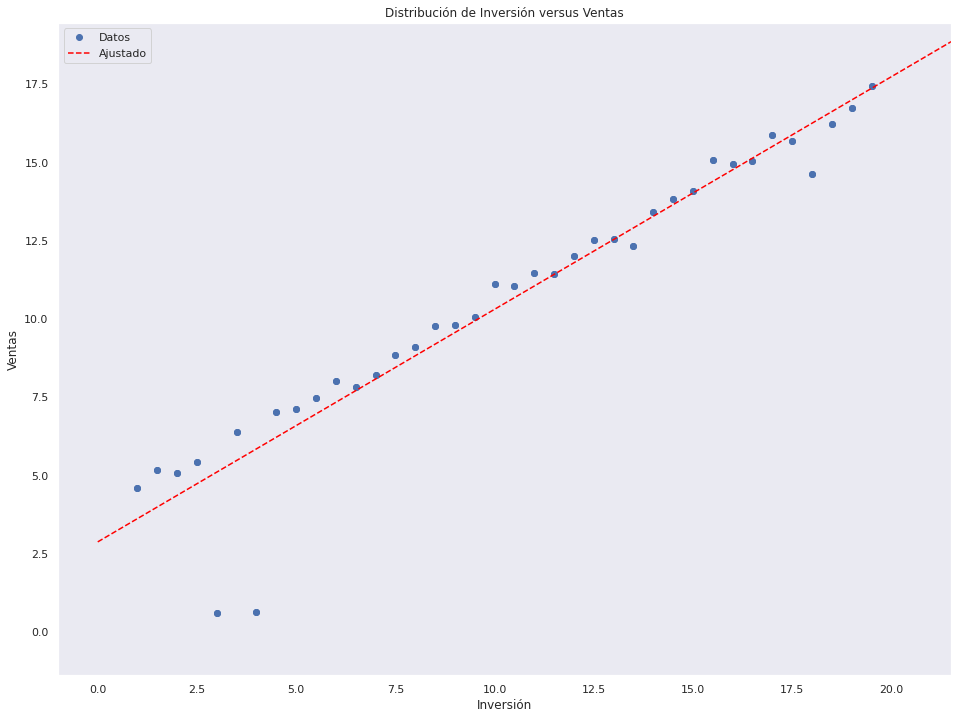

In [87]:
from scipy import stats as ss

#linregress es el metodo para extraer la recta
pendiente, coeficiente, pearson, p, error = ss.linregress(df["Inversion"],df["Ventas"])

def Prediccion_ventas(x):
    return coeficiente + pendiente*x

recta = np.vectorize(Prediccion_ventas)
linea = Prediccion_ventas(np.arange(3000))

# labels
fig, ax = plt.subplots(figsize=(16,12)) 
plt.title("Distribución de Inversión versus Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(df["Inversion"].min() - 2 , df["Inversion"].max() + 2 )
plt.ylim(df["Ventas"].min() - 2 , df["Ventas"].max() + 2 )

# Nube de puntos + recta de regresión
plt.scatter(df["Inversion"],df["Ventas"])
colores= ['blue', 'red']
ax.plot(df["Inversion"], df["Ventas"], 'o' , label='Datos' )
ax.plot(linea , 'r--', color='red', label="Ajustado")
legend = ax.legend(loc="best") 


In [88]:
print(f"Pendiente: {pendiente}\nCoeficiente: {coeficiente}\nCoeficiente Pearson: {pearson}\nP-Values: {p}\nError: {error}")

Pendiente: 0.7426698763540868
Coeficiente: 2.8805285042127142
Coeficiente Pearson: 0.9562823420491505
P-Values: 8.25497955552195e-21
Error: 0.0378532029452961


In [95]:
print(Prediccion_ventas(7))

8.079217638691322


In [96]:
var1 = df["Ventas"] - df["Inversion"].map(Prediccion_ventas)

In [97]:
print(sum(var1**2))

58.927288456067366


**Utilizando Libreria Statsmodels**

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. 

In [100]:
X = df[['Inversion']]
y = df['Ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [107]:
# Creación del modelo utilizando el modo fórmula 
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Inversion', 'Ventas'])
modelo = smf.ols(formula = 'Ventas ~ Inversion', data = df)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        02:01:14   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8805      0.440      6.546      0.0

**Intervalos de confianza de los coeficientes**

In [108]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

,0,1
Intercept,1.988131,3.772926
Inversion,0.665900,0.819440


In [111]:
modelo.ssr

58.927288456067394

In [114]:
y_pred = modelo.predict([7])
#     print(type(y), type(y_pred))
#     print(y, y_pred)

PatsyError: ignored

In [116]:
from patsy import dmatrices
y, X = dmatrices('Ventas ~ Inversion', data=df, return_type='dataframe')

In [117]:
mod = sm.OLS(y, X)    # Describe el modelo
res = mod.fit()       # Ajusta el modelo
print(res.summary())   # Resume el modelo

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        02:23:05   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8805      0.440      6.546      0.0

In [124]:
res.params

Intercept    2.880529
Inversion    0.742670
dtype: float64

El modelo lineal generado sigue la ecuación:

Ventas = 2.880529 + 0.742670*Inversion

In [135]:
Ventas = 2.880529 + 0.742670*7

In [136]:
Ventas

8.079219

In [126]:
res.ssr

58.927288456067394

In [129]:
res.f_pvalue


8.25497955552173e-21

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( 𝛽̂ 0  y  𝛽̂ 1 ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

runs = -2367.7028 + 0.6305 bateos
 
Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.

El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.